In [1]:
import os

import torch
import umap
import umap.plot
import numpy as np
import matplotlib.pylab as plt
import pandas

/home/bryan-smithl/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
features_count = 100000
image_features = torch.rand([features_count, 512])

In [3]:
dimreducer = umap.UMAP().fit(image_features.numpy())

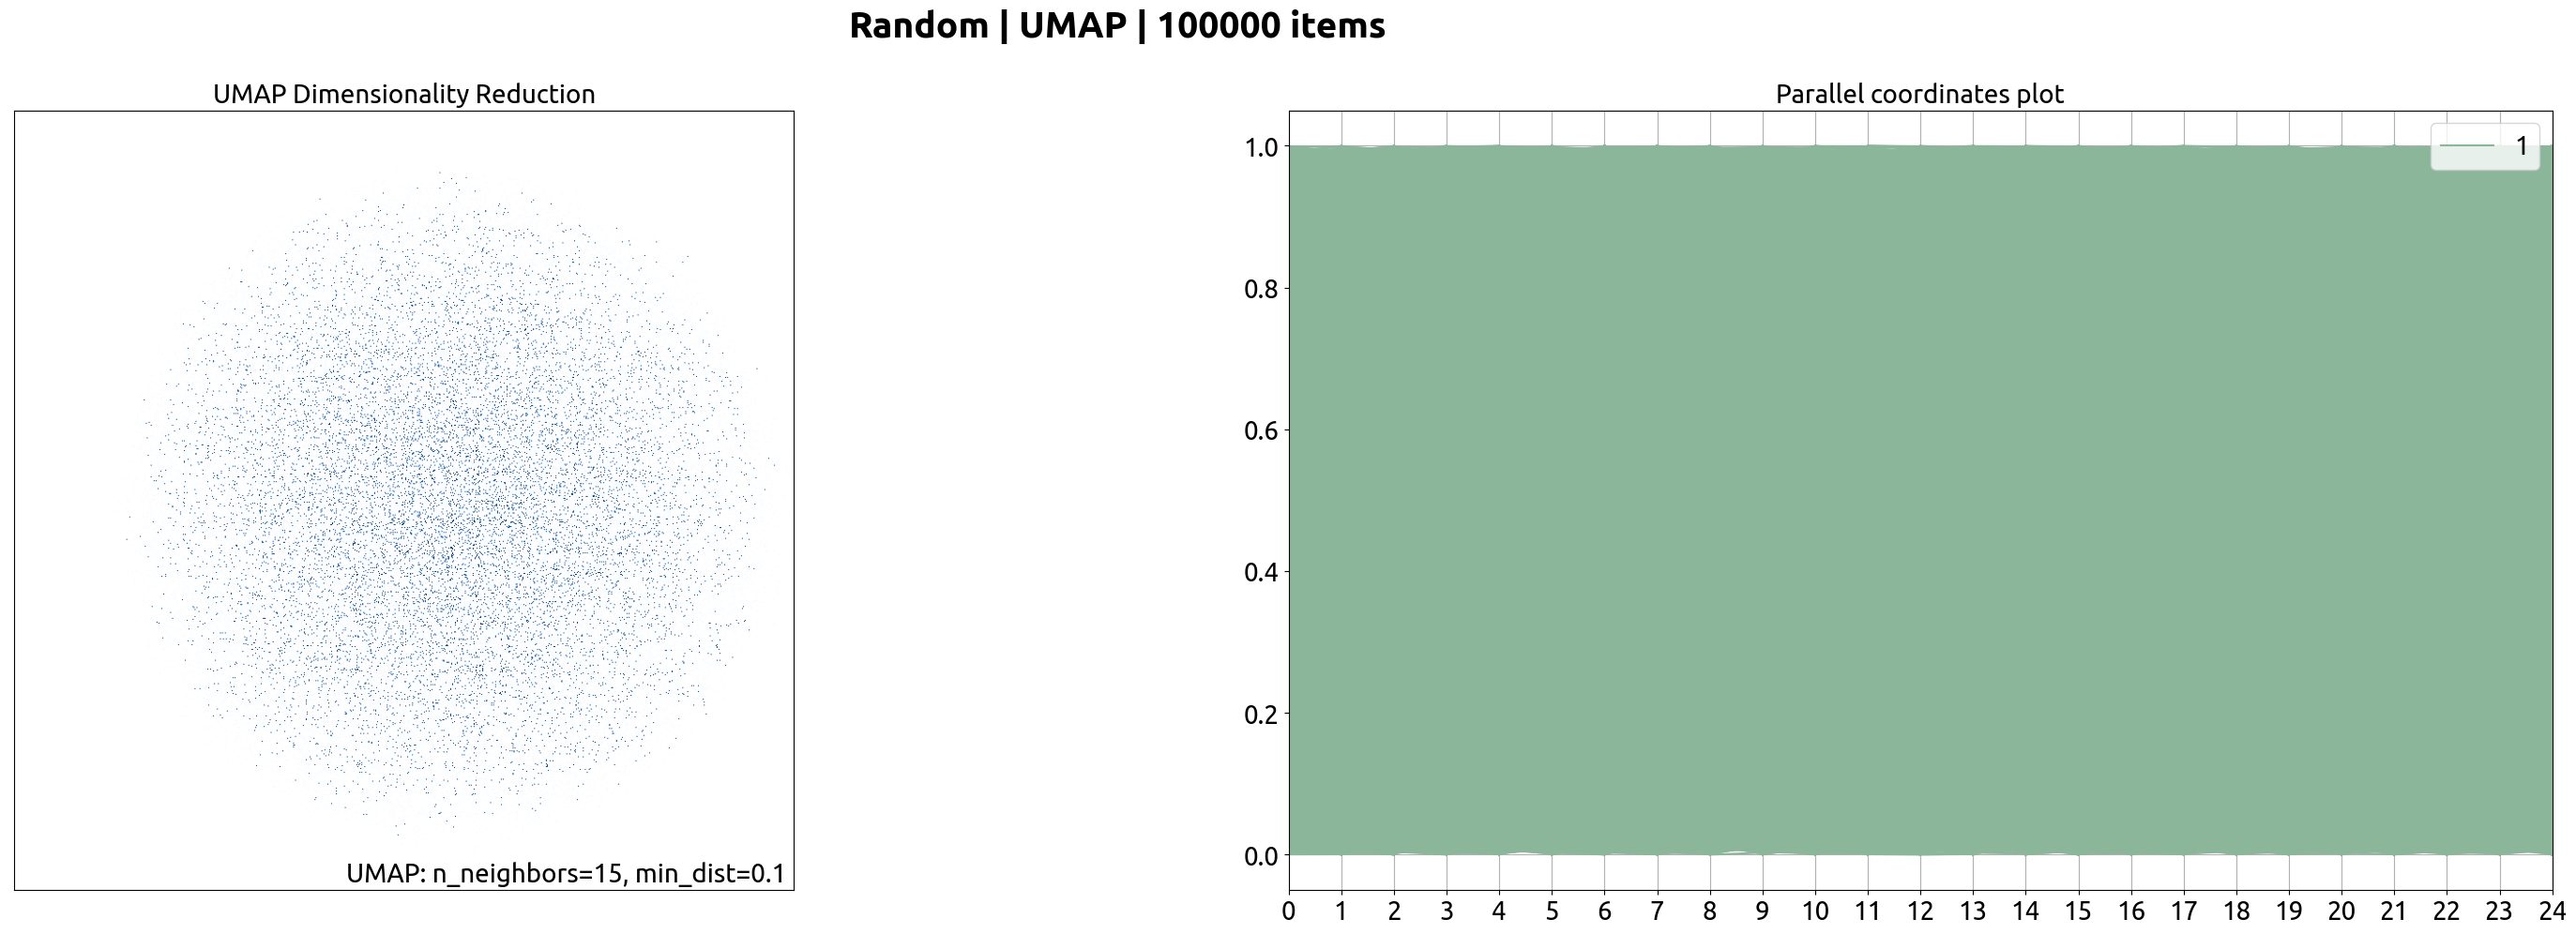

In [4]:
px = 1/plt.rcParams['figure.dpi'] # matplotlib sizes are in inches :-( :-( :-(
width = 3824
height = 1080

plt.rc("font", size=20)
plt.rc("font", family="Ubuntu")
figure = plt.figure(figsize=(width*px, height*px))
figure.add_subplot(1, 2, 1)

# 1: UMAP
umap.plot.points(dimreducer,
    ax=figure.get_axes()[0]
)
plt.title(f"UMAP Dimensionality Reduction", fontsize=20)

# 2: Parallel coordinates
figure.add_subplot(1, 2, 2)
dataframe = pandas.DataFrame(image_features[:,0:25].numpy())
dataframe["Label"] = [1] * features_count
pandas.plotting.parallel_coordinates(
    dataframe,
    "Label",
    ax=figure.get_axes()[1],
    use_columns=False,
    axvlines=False,
    sort_labels=True
)

plt.title(f"Parallel coordinates plot", fontsize=20)

plt.suptitle(f"Random | UMAP | {features_count} items", fontsize=28, weight="bold")
plt.show()